# Import libraries

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go

2023-02-02 01:10:54.602089: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Conv2DTranspose, Reshape, BatchNormalization, LeakyReLU, Dropout

# Import Data

In [3]:
# set seed
tf.random.set_seed(42)

In [3]:
# Load real monet data
real_photos_path = '/Users/alijanatiidr/Desktop/Prog/Projects/Large-scale-machine-learning-and-data-mining/Day2_Deep learning/Monet_style_GAN/Data/monet_jpg'
real_photos = os.listdir(real_photos_path)
# read the images
real_photos = [plt.imread(os.path.join(real_photos_path, photo)) for photo in real_photos]
# convert to numpy array
real_photos = np.array(real_photos)

real_photos.shape

(300, 256, 256, 3)

In [4]:
# Normalize real photos
real_photos = real_photos / 255

In [5]:
# Load fake monet data
fake_photos_path = '/Users/alijanatiidr/Desktop/Prog/Projects/Large-scale-machine-learning-and-data-mining/Day2_Deep learning/Monet_style_GAN/Data/photo_jpg'
fake_photos = os.listdir(fake_photos_path)
# read the images
fake_photos = [plt.imread(os.path.join(fake_photos_path, photo)) for photo in fake_photos]
# convert to numpy array
fake_photos = np.array(fake_photos)

fake_photos.shape

(7038, 256, 256, 3)

In [6]:
# keep 300 fake photos
fake_photos = fake_photos[:300]
fake_photos.shape

(300, 256, 256, 3)

In [7]:
# Normalize fake photos
fake_photos = fake_photos / 255

# Implementing GAN

- The GAN will take the fake photos as a noise
- The intuition is that it will apply transformations to this photo to make it look like a Monet painting and "fool" the discriminator.

In [9]:
# Implementing GAN
# Define the dense discriminator model
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[256, 256, 3]))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss="binary_crossentropy", optimizer="adam")

# Define the generator model knowing that we have inputs of dimension(256, 256, 3)
generator = Sequential()
generator.add(Flatten(input_shape=[256, 256, 3]))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256*256*3))
generator.add(Reshape([256, 256, 3]))

# Define the GAN model
GAN = Sequential([generator, discriminator])

# Compile the GAN model
discriminator.trainable = False
GAN.compile(loss="binary_crossentropy", optimizer="adam")

2023-01-31 10:43:31.992433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       226990976 
                                                                 
 sequential (Sequential)     (None, 1)                 50373121  
                                                                 
Total params: 277,364,097
Trainable params: 226,988,160
Non-trainable params: 50,375,937
_________________________________________________________________


In [11]:
# Train the GAN model
# Define the batch size
batch_size = 30
# Define the number of epochs
epochs = 100

with tf.device('/gpu:0'):
    for epoch in range(epochs):
        print("Epoch: ", epoch)
        for i in range(len(real_photos) // batch_size):
            # Define the real images
            real_images = real_photos[i * batch_size:(i + 1) * batch_size]
            # Define the fake images
            fake_images = generator.predict(fake_photos[i * batch_size:(i + 1) * batch_size])
            # Train the discriminator
            # Define the input images
            X = np.concatenate([real_images, fake_images])
            # Define the output labels
            y = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            discriminator.trainable = True
            discriminator.train_on_batch(X, y)
            # Train the generator
            discriminator.trainable = False
            GAN.train_on_batch(fake_photos[i * batch_size:(i + 1) * batch_size], np.ones((batch_size, 1)))

# Generate fake images
fake_images = generator.predict(fake_photos[:10])

Epoch:  0
1/1 [==============================] - 0s 183ms/step
Epoch:  1
1/1 [==============================] - 0s 165ms/step
Epoch:  2
1/1 [==============================] - 0s 192ms/step
Epoch:  3
1/1 [==============================] - 0s 269ms/step
Epoch:  4
1/1 [==============================] - 0s 176ms/step
Epoch:  5
1/1 [==============================] - 0s 186ms/step
Epoch:  6
1/1 [==============================] - 0s 145ms/step
Epoch:  7
1/1 [==============================] - 0s 187ms/step
Epoch:  8
1/1 [==============================] - 0s 181ms/step
Epoch:  9
1/1 [==============================] - 0s 168ms/step
Epoch:  10
1/1 [==============================] - 0s 205ms/step
Epoch:  11
1/1 [==============================] - 0s 159ms/step
Epoch:  12
1/1 [==============================] - 0s 188ms/step
Epoch:  13
1/1 [==============================] - 0s 190ms/step
Epoch:  14
1/1 [==============================] - 0s 189ms/step
Epoch:  15
1/1 [==============================] - 

In [12]:
fake_images.shape

(10, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


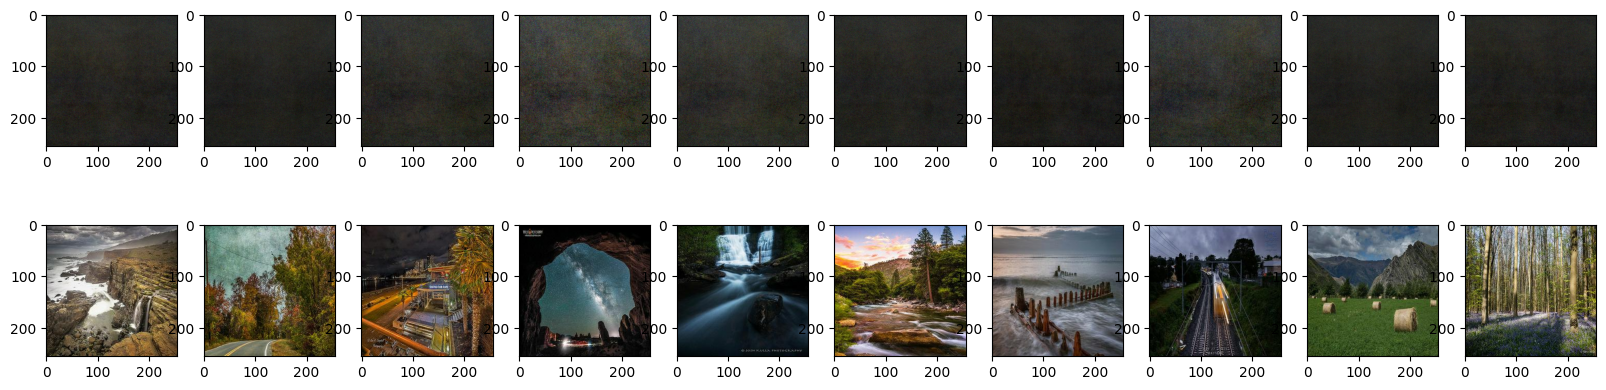

In [13]:
# Plot the fake images and the fake photos with matplotlib 
fig, axes = plt.subplots(2, 10, figsize=(20, 5))
for i in range(10):
    axes[0, i].imshow(fake_images[i])
    axes[1, i].imshow(fake_photos[i])

- The outputs of the generators converged on a specific type of image that is most likely to "fool" the discriminator (We will try to solve this issue later on by implementing a DCGAN model)
- This type of image is Dark with some color touches
- Nevertheless, we can use these outputs as filters to superpose to the photos we want to transform as Monet paints

In [14]:
# Save models
generator.save('generator.h5')
discriminator.save('discriminator.h5')

In [8]:
# Load saved models
generator = keras.models.load_model('generator.h5')
discriminator = keras.models.load_model('discriminator.h5')

2023-02-02 01:11:53.341817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Generate fake images
fake_images = generator.predict(fake_photos)

10/10 [==============================] - 1s 108ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

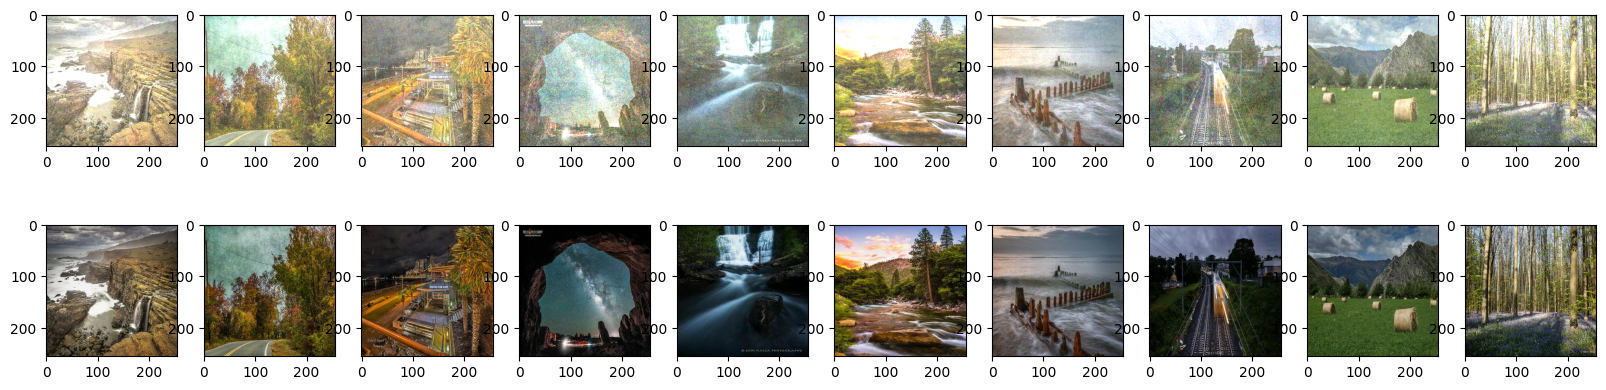

In [15]:
# Define multiplicative factor
multiplicative_factor = 2.2

# superpose the fake images and the fake photos by adding their components 1 by 1
superposed_images = (multiplicative_factor * fake_images) + fake_photos

# Plot the superposed images
fig, axes = plt.subplots(2, 10, figsize=(20, 5))
for i in range(10):
    axes[0, i].imshow(superposed_images[i])
    axes[1, i].imshow(fake_photos[i])

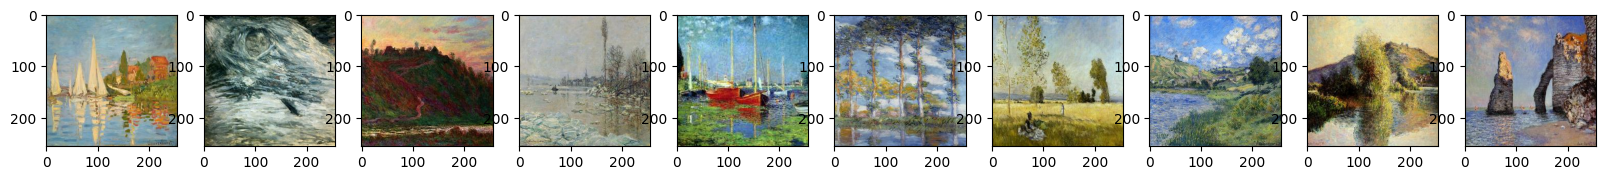

In [14]:
# plot monet paintings (real photos)
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    axes[i].imshow(real_photos[i])